In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np

In [3]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
df["time"].value_counts()

,count
time,
Dinner,176
Lunch,67


In [10]:
encoded_time = {"Dinner" : 0, "Lunch" : 1}

df["time"] = df["time"].map(encoded_time)

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4


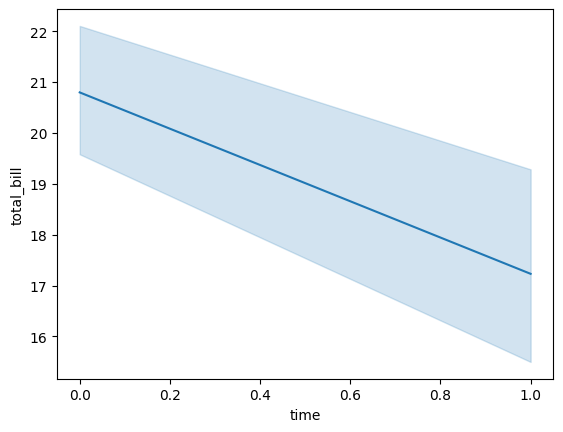

In [24]:
sns.lineplot(data=df, y="total_bill", x="time")
plt.show()

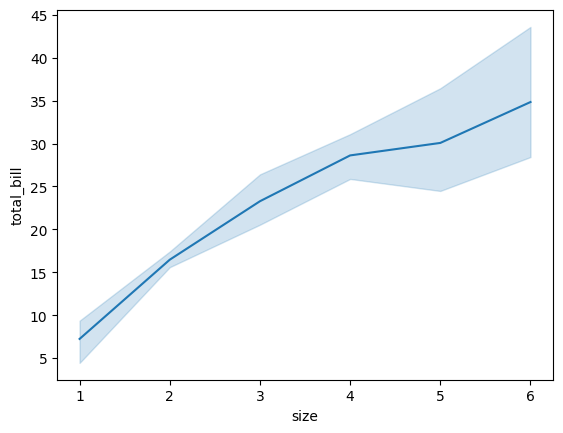

In [25]:
sns.lineplot(data=df, x="size", y="total_bill")
plt.show()

In [13]:
print(min(df["total_bill"]))

3.07


In [14]:
from sklearn.model_selection import train_test_split

x = df[["total_bill", "time", "size"]]
y = df["tip"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

le_model = LinearRegression()
le_model.fit(x_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pred = le_model.predict(x_test)

r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.4f}")

mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 0.5214
Mean Absolute Error (MAE): 0.7690
Mean Squared Error (MSE): 1.1662
Root Mean Squared Error (RMSE): 1.0799


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rf_pred = rf_model.predict(x_test)

r2 = r2_score(y_test, rf_pred)
print(f"R² Score: {r2:.4f}")

mae = mean_absolute_error(y_test, rf_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

mse = mean_squared_error(y_test, rf_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 0.4223
Mean Absolute Error (MAE): 0.8973
Mean Squared Error (MSE): 1.4075
Root Mean Squared Error (RMSE): 1.1864


In [19]:
import pickle

In [20]:
with open("le_model.pkl","wb") as file:
    pickle.dump(le_model, file)

In [21]:
x.to_csv("features.csv")